<a href="https://colab.research.google.com/github/kaizen-abhinav/PDECODE-APPLICATIONCHALLENGES/blob/main/Experiment_7_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Problem: Mass-Spring-Damper System
In robotics and mechanical engineering, a mass-spring-damper system is a fundamental model for oscillatory behavior, such as a robot arm with flexibility or a vehicle’s suspension. Governing Equation: The motion of the mass $y(t)$
 is described by the second-order linear ODE: $my''(t)+cy'(t)+ky(t)=F(t)$

 Your Task:

Solve for the motion of a system with the following parameters: - Mass (m): 1 kg - Damping coefficient (c): 2 Ns/m (This represents friction/drag) - Spring constant (k): 5 N/m - External Force (F(t)): 0 (The system is disturbed and then left alone) - Initial Conditions: The system is pulled from its equilibrium position and released from rest.

Initial position: $y(0)=1$
 meter Initial velocity: $y'(0)=0$
 m/s

Use the Laplace Transform method in `SymPy` to find and visualize the displacement $y(t)$
.



## Solution to the Application Problem: Mass-Spring-Damper System

We will now solve the second-order ODE for the mass-spring-damper system using the same `sympy.dsolve` method, which internally uses the Laplace transform technique.

**Problem Recap:**

**Equation:** $1 \cdot y''(t) + 2 \cdot y'(t) + 5 \cdot y(t) = 0$
**Initial Conditions:** $y(0) = 1$

Manual Laplace Transform Steps (for understanding):

1. Transform the ODE:
- $\mathcal{L}\{y''\} + 2\mathcal{L}\{y'\} + 5\mathcal{L}\{y\} = \mathcal{L}\{0\}$

- $\left[s^2Y(s) - sy(0) - y'(0)\right] + 2\left[sY(s) - y(0)\right] + 5Y(s) = 0$

2. Incorporate Initial Conditions:
- $\left[s^2Y(s) - s(1) - 0\right] + 2\left[sY(s) - 1\right] + 5Y(s) = 0$
- $s^2Y(s) - s + 2sY(s) - 2 + 5Y(s) = 0$

3. Solve for Y(s):
- $Y(s)(s^2 + 2s + 5) = s + 2$
- $Y(s) = \frac{s+2}{s^2 + 2s + 5}$

4. Inverse Transform: Find $y(t) = \mathcal{L}^{-1}\left\{ \frac{s+2}{s^2 + 2s + 5} \right\}$

. This requires completing the square in the denominator and using the transform pairs for damped sinusoids.


# Python Implementation


The symbolic solution for the system's motion is:


Eq(y(t), (0.5*sin(2.0*t) + 1.0*cos(2.0*t))*exp(-1.0*t))

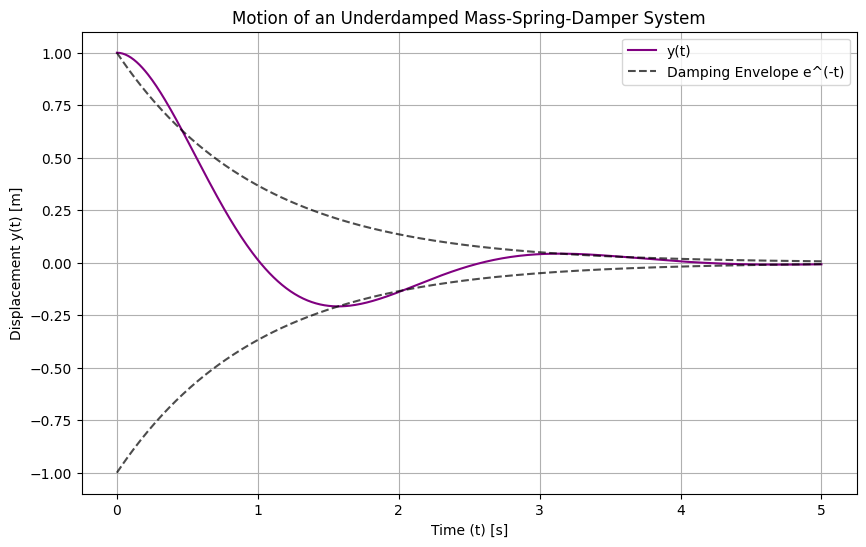

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Symbols, Function, and Parameters ---
t = sp.Symbol('t', positive=True)
y = sp.Function('y')

# System parameters
m = 1.0
c_damp = 2.0  # Renamed to avoid conflict with sympy's 'c' symbol
k = 5.0

# --- 2. Define and Solve the ODE ---
# Define the differential equation: my'' + cy' + ky = 0
ode = m * y(t).diff(t, 2) + c_damp * y(t).diff(t) + k * y(t)

# Define the initial conditions in a dictionary
# The derivative at t=0 is specified using .subs()
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}

# Solve the ODE using dsolve. SymPy automatically handles this structure.
solution = sp.dsolve(ode, ics=ics)

# Display the symbolic solution
print("The symbolic solution for the system's motion is:")
display(solution)
y_t = solution.rhs

# --- 3. Visualize the Solution ---
# Convert the symbolic solution into a numerical function
y_func = sp.lambdify(t, y_t, modules=['numpy'])

# Generate time values for the plot
t_vals = np.linspace(0, 5, 500)
y_vals = y_func(t_vals)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_vals, label=f"y(t)", color='purple')
# Plot an exponential decay envelope to highlight the damping
envelope = np.exp(-t_vals) # From the e^(-t) term in the solution
plt.plot(t_vals, envelope, 'k--', label='Damping Envelope e^(-t)', alpha=0.7)
plt.plot(t_vals, -envelope, 'k--', alpha=0.7)

plt.title("Motion of an Underdamped Mass-Spring-Damper System")
plt.xlabel("Time (t) [s]")
plt.ylabel("Displacement y(t) [m]")
plt.grid(True)
plt.legend()
plt.show()

**Results and Discussion**
Symbolic Solution: The solution obtained is $y(t)=(\sin(2t)+\cos(2t))e^{−t}$
. This mathematical form is characteristic of an underdamped second-order system. It consists of two parts:

- Oscillatory Part:
 represents the natural oscillation of the mass on the spring. The frequency of this oscillation is $y(t)=(\sin(2t)+\cos(2t))e^{-t}$
 rad/s.

- Decay Part: $e^{-t}$
 is an exponential decay envelope that multiplies the oscillation. This term represents the effect of the damper (friction), which removes energy from the system over time.

- Visual Analysis: The plot clearly visualizes this behavior.

- Initial Conditions: The curve starts at $y=1$
 and its initial slope is zero (horizontal), perfectly matching the initial $y(0)=0$conditions
, and $y'(0)=0$
.

- Oscillation: The mass oscillates back and forth around its equilibrium position ( $y=0$
). Damping: The amplitude of these oscillations is not constant; it progressively decreases over time, confined within the black dashed lines representing the damping envelope. Eventually, the mass will come to rest at $y=0$
.

- Engineering Significance: This result is fundamental in control systems and robotics. If this were a robot arm, this “ringing” or oscillation after a command might be undesirable. An engineer would use this model to perhaps increase the damping ( $c\_damp$
) to achieve a critically damped or overdamped response, where the arm moves to its target position smoothly without overshooting and oscillating. The Laplace Transform method is the cornerstone of this type of analysis.